In [2]:
from qiskit import *

In [3]:
qr = QuantumRegister(2)

In [4]:
cr = ClassicalRegister(2)

In [5]:
circuit = QuantumCircuit(qr, cr)

In [6]:
%matplotlib inline

In [7]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [8]:
circuit.h(qr[0]) #hadimard gate

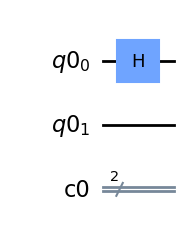

In [9]:
circuit.draw(output='mpl')

In [11]:
circuit.cx(qr[0], qr[1]) #2 qubit op - Quantum equivalent of if

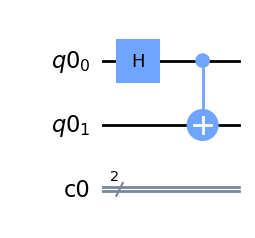

In [12]:
circuit.draw(output='mpl')

In [13]:
circuit.measure(qr, cr)

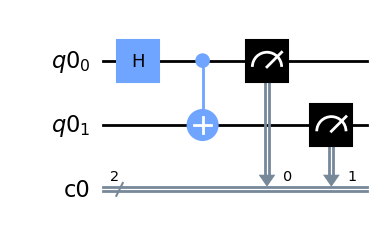

In [14]:
circuit.draw(output='mpl')

In [17]:
#simulate and run it on the normal computer first
simulator = Aer.get_backend('qasm_simulator') #importing Aer simulator

In [26]:
result = execute(circuit, backend=simulator).result()

In [27]:
from qiskit.tools.visualization import plot_histogram

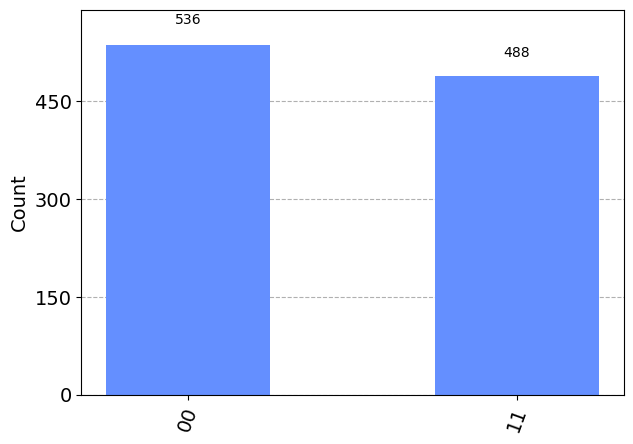

In [28]:
plot_histogram(result.get_counts(circuit))

In [29]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [32]:
provider = IBMQ.get_provider('ibm-q')

In [33]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [34]:
qcomp = provider.get_backend('ibm_oslo')

In [35]:
job = execute(circuit, backend=qcomp)

In [36]:
from qiskit.tools.monitor import job_monitor

In [37]:
job_monitor(job)

Job Status: job has successfully run


In [43]:
result = job.result()

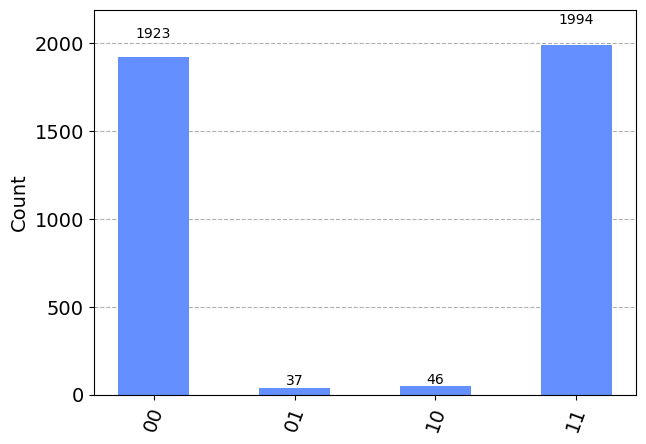

In [44]:
plot_histogram(result.get_counts(circuit))